## Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from impedance.models.circuits import CustomCircuit
# from impedance.visualization import plot_nyquist # Kept if you want to switch plotting methods

## Data Loading

In [12]:
# --- Data Loading ---

def lpr_cor_import(filename):
    """ Import cor file as pandas dataframe."""
    return pd.read_csv(
        filename,
        skiprows=26,
        sep='\s+',
        header=None,
        names=["E", "i", "T"],
    ) #index_col="Freq")
    
try:
    CS_LPR_1 = lpr_cor_import("Cast_Stellite1_LPR/LPR_1.cor")
    #LPR_HS_1_df = lpr_cor_import("HIPed_Stellite1_Sample1_Actual/LPR.cor")    
    #LPR_HS_2_df = lpr_cor_import("HIPed_Stellite1_Sample1_Actual/LPR_2.cor")    
    
except FileNotFoundError as e:
    print(f"Error: File was not found.")
    print(e.message)
    print(e.args)
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

CS_LPR_1.head()

E             i         T
0 -0.174013 -7.016190e-08   2.99401
1 -0.173515 -5.165820e-08   5.98802
2 -0.173024 -4.036700e-08   8.98204
3 -0.172538 -3.396700e-08  11.97605
4 -0.172039 -2.785440e-08  14.97006

In [13]:
df_concat = pd.concat((CS_LPR_1, CS_LPR_2, CS_LPR_3))
df_means = df_concat.groupby(df_concat.index).mean()
df_err = df_concat.groupby(df_concat.index).std()


In [14]:
df_means.head()

E             i         T
0 -0.213767 -4.673386e-08   2.99401
1 -0.213257 -3.026957e-08   5.98802
2 -0.212761 -2.028820e-08   8.98204
3 -0.212273 -1.442430e-08  11.97605
4 -0.211776 -9.352567e-09  14.97006

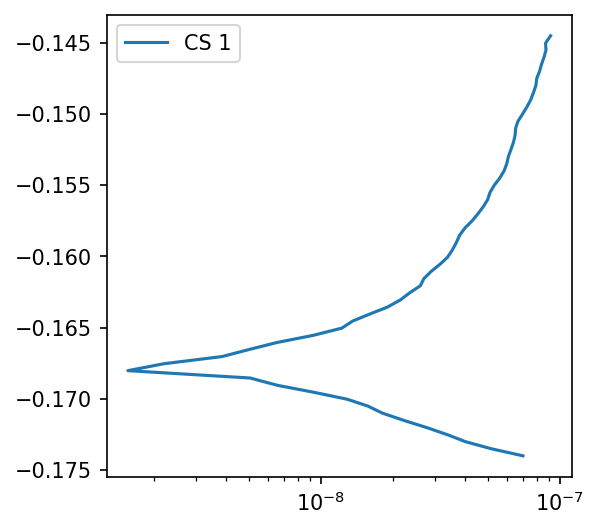

In [16]:
fig, ax = plt.subplots(figsize=(4,4), sharex=True, dpi=150)

ax.semilogx(np.abs(CS_LPR_1["i"].to_numpy()), CS_LPR_2["E"].to_numpy(), markersize=5, label="CS 1")

ax.legend()
plt.show()